In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

In [28]:
plt.rcParams['figure.figsize'] = 11, 5
plt.rcParams['figure.dpi'] = 100

In [2]:
tip = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
flights = sns.load_dataset("flights")

In [3]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
flights.shape

(144, 3)

In [6]:
engine = sqlalchemy.create_engine("mysql://root@localhost:3306/world")
conn = engine.connect()

In [7]:
conn

In [9]:
data = pd.read_sql_query("show tables", conn)

In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
pd.read_sql_query("show tables", conn)

,Tables_in_world
0,city
1,country
2,countrylanguage


In [13]:
pd.read_sql_query("select * from city limit 5", conn)

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


In [15]:
city = pd.read_sql_table("city", conn)

In [16]:
city.shape

(4079, 5)

In [18]:
city.groupby("CountryCode").count()

,ID,Name,District,Population
CountryCode,,,,
ABW,1,1,1,1
AFG,4,4,4,4
AGO,5,5,5,5
AIA,2,2,2,2
ALB,1,1,1,1
...,...,...,...,...
YEM,6,6,6,6
YUG,8,8,8,8
ZAF,44,44,44,44


In [19]:
city['Population'].sum()

1429559884

In [22]:
df = pd.read_sql_query("select * from countrylanguage where language='english'", conn)

<AxesSubplot:>

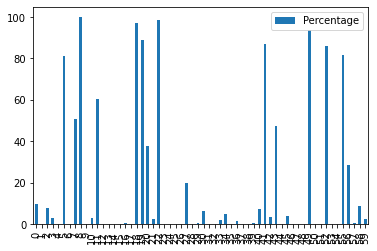

In [27]:
df[['CountryCode', 'Percentage']].plot(kind="bar")

In [31]:
len(df)

60

In [32]:
from random import randint

In [3]:
%%writefile generate_color.py
"""
This module is used to generate 
random hex code of colors

color_generate() --> func
It will return random color
"""

import numpy as np

def color_generate():
    """This function will generate and return random color"""
    val = list("abcdef0123456789") 
    color = "".join(np.random.choice(val, 6))
    return "#" + color

Overwriting generate_color.py


In [43]:
color_generate()

'#bf51a1'

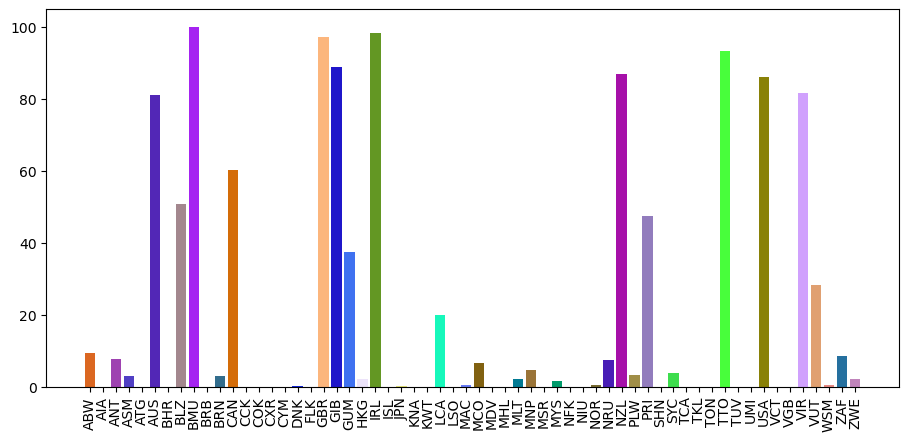

In [45]:
plt.bar(df['CountryCode'], df['Percentage'], color=[color_generate() for i in range(len(df))])
plt.xticks(rotation=90)
plt.show()

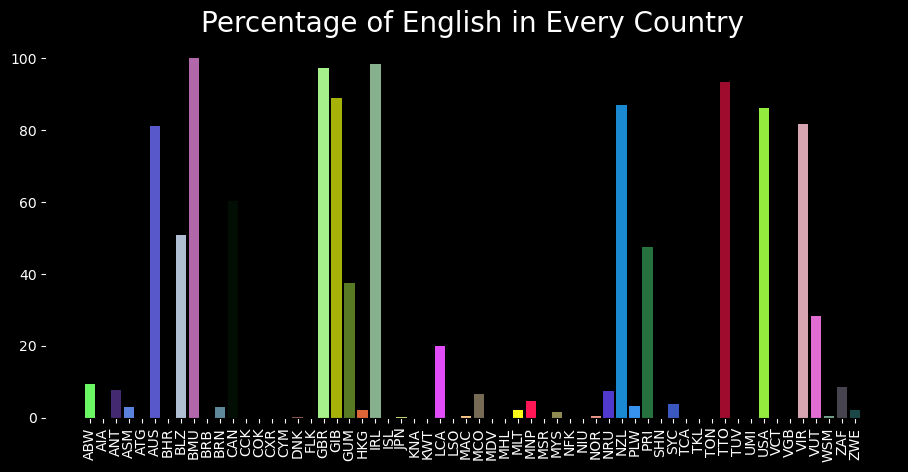

In [50]:
plt.figure(facecolor='black')
ax = plt.gca()
ax.set_facecolor("black")
plt.bar(df['CountryCode'], df['Percentage'], color=[color_generate() for i in range(len(df))])
plt.xticks(rotation=90)
plt.tick_params(labelcolor='white', labelsize=10, color='white')
plt.title("Percentage of English in Every Country", color='white', fontsize=20)
plt.show()

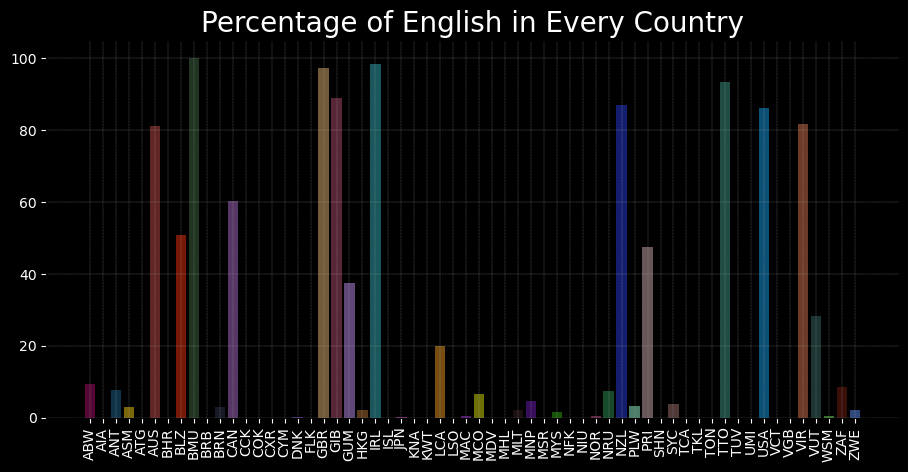

In [57]:
plt.figure(facecolor='black')
ax = plt.gca()
ax.set_facecolor("black")
plt.bar(df['CountryCode'], df['Percentage'], color=[color_generate() for i in range(len(df))],
       alpha=0.5)
plt.xticks(rotation=90)
plt.tick_params(labelcolor='white', labelsize=10, color='white')
plt.title("Percentage of English in Every Country", color='white', fontsize=20)
plt.grid(lw=0.2, ls="--")  # lw --> linewidth,, ls --> line style
plt.show()

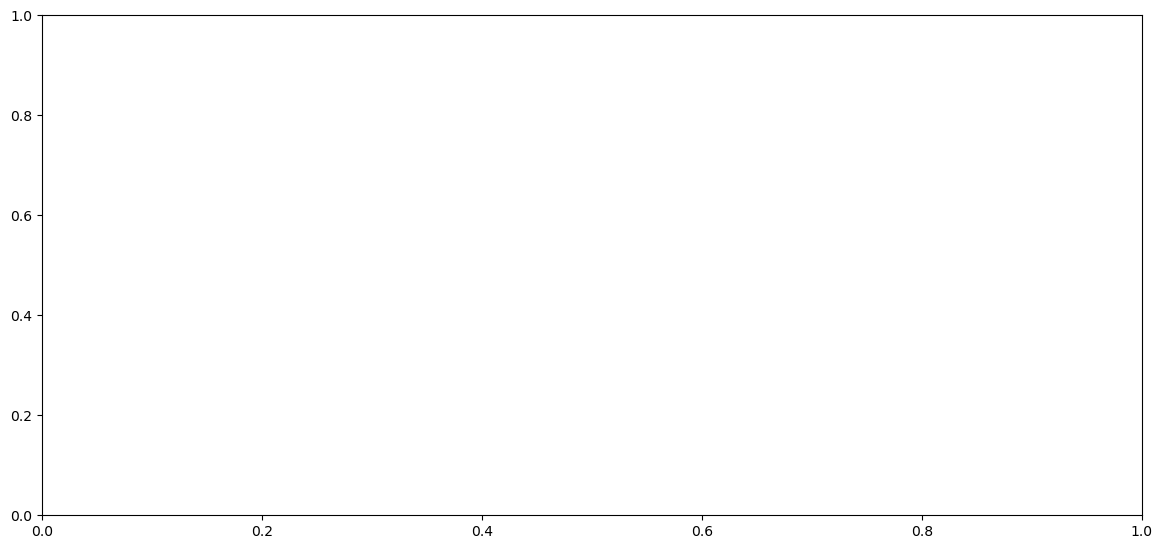

In [58]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])

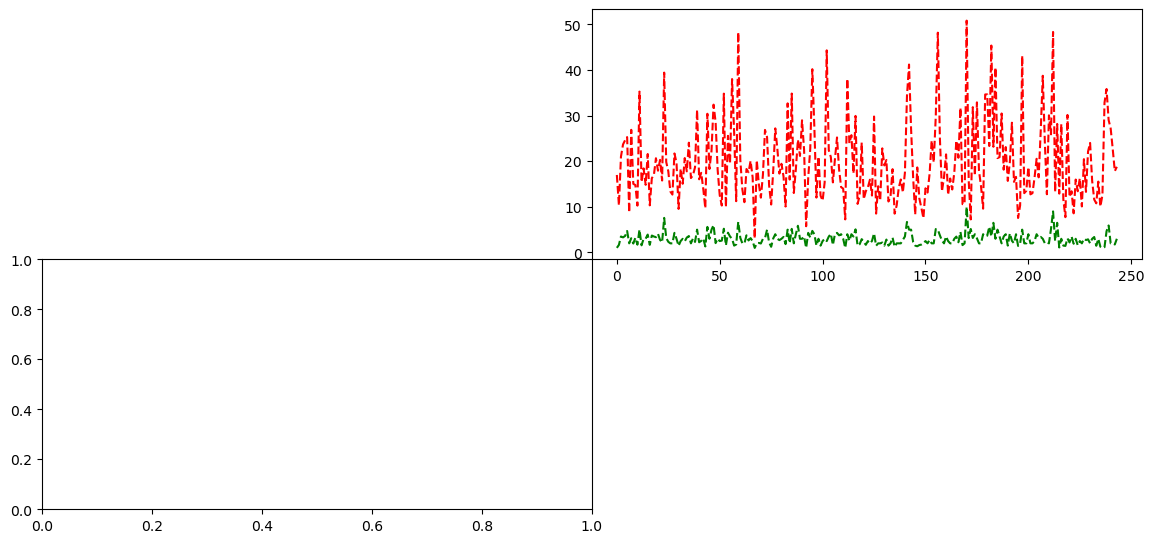

In [60]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 0.5])
ax2 = fig.add_axes([0.5, 0.5, 0.5, 0.5])
plt.plot(tip['total_bill'], 'r--')
plt.plot(tip['tip'], 'g--')
plt.show()

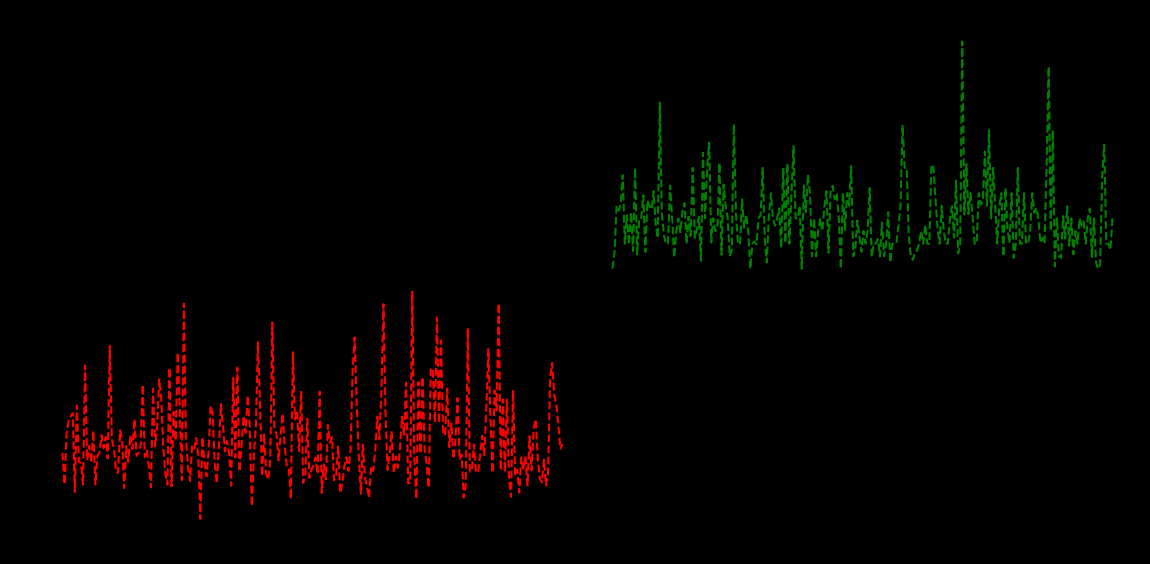

In [63]:
fig = plt.figure(facecolor="black")
ax1 = fig.add_axes([0, 0, 0.5, 0.5], facecolor="black")
ax2 = fig.add_axes([0.5, 0.5, 0.5, 0.5], facecolor="black")
ax1.plot(tip['total_bill'], 'r--')
ax2.plot(tip['tip'], 'g--')
ax1.set_title("Total_Bill")
ax2.set_title("Tip")
plt.show()

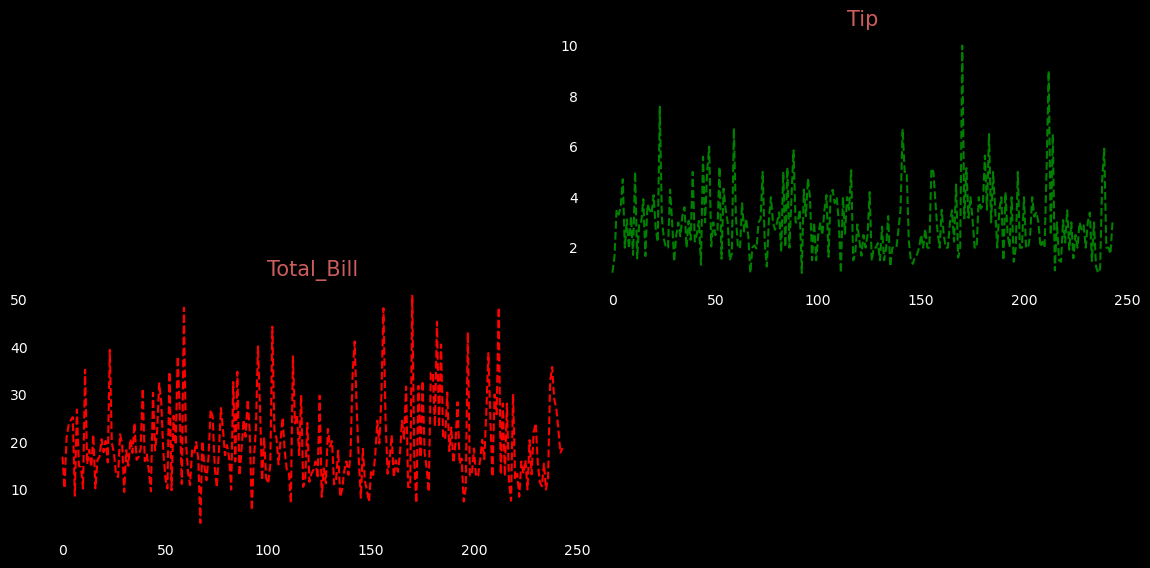

In [64]:
fig = plt.figure(facecolor="black")
ax1 = fig.add_axes([0, 0, 0.5, 0.5], facecolor="black")
ax2 = fig.add_axes([0.5, 0.5, 0.5, 0.5], facecolor="black")
ax1.plot(tip['total_bill'], 'r--')
ax2.plot(tip['tip'], 'g--')
ax1.set_title("Total_Bill", color="indianred", fontsize=15)
ax2.set_title("Tip", color="indianred", fontsize=15)
ax1.tick_params(labelcolor="white", labelsize=10)
ax2.tick_params(labelcolor="white", labelsize=10)
plt.show()

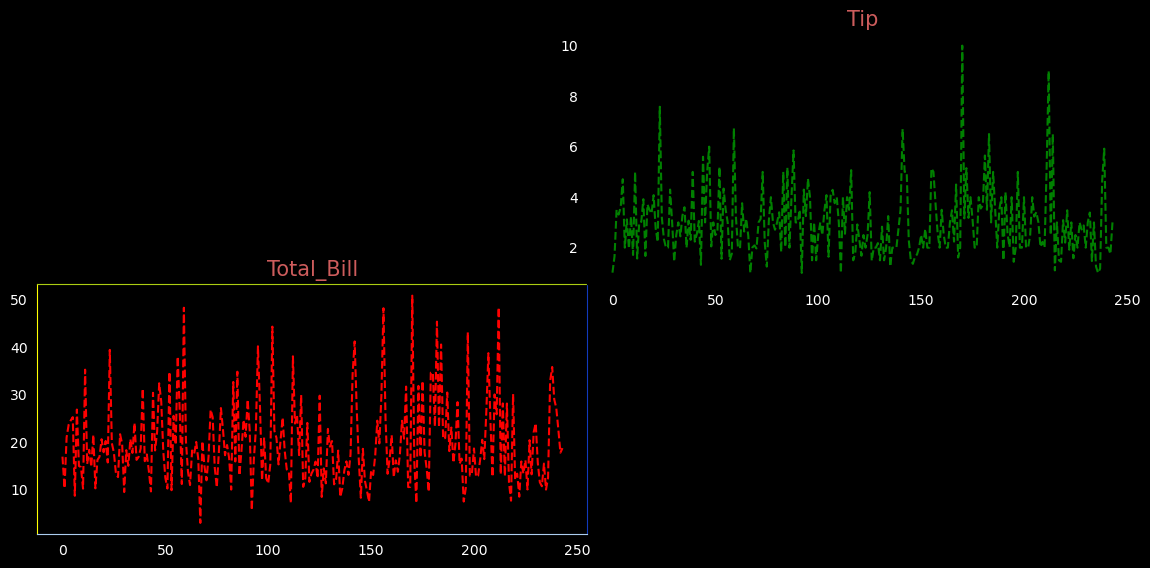

In [71]:
fig = plt.figure(facecolor="black")
ax1 = fig.add_axes([0, 0, 0.5, 0.5], facecolor="black")
ax2 = fig.add_axes([0.5, 0.5, 0.5, 0.5], facecolor="black")
ax1.plot(tip['total_bill'], 'r--')
ax2.plot(tip['tip'], 'g--')
ax1.set_title("Total_Bill", color="indianred", fontsize=15)
ax2.set_title("Tip", color="indianred", fontsize=15)
ax1.spines['left'].set_color("yellow")
ax1.spines['bottom'].set_color("#abcdef")
ax1.spines['right'].set_color("#123abc")
ax1.spines['top'].set_color("#abcd12")
for ax in (ax1, ax2):
    ax.tick_params(labelcolor="white", labelsize=10)
plt.show()

In [70]:
ax1.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x23f000789d0>),
             ('right', <matplotlib.spines.Spine at 0x23f00078070>),
             ('bottom', <matplotlib.spines.Spine at 0x23f000788e0>),
             ('top', <matplotlib.spines.Spine at 0x23f00078880>)])

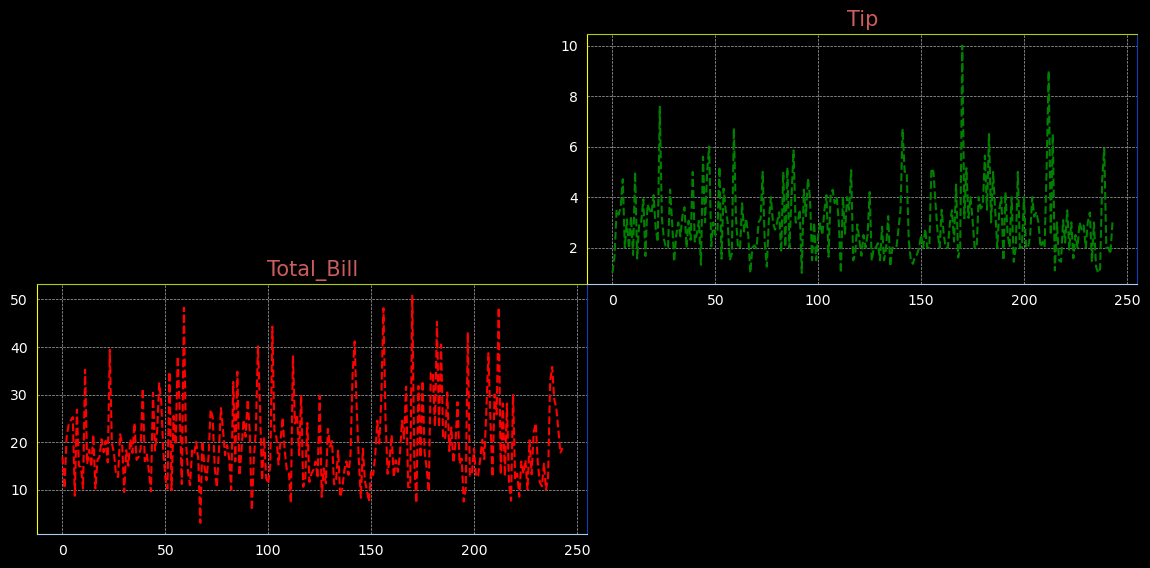

In [75]:
fig = plt.figure(facecolor="black")
ax1 = fig.add_axes([0, 0, 0.5, 0.5], facecolor="black")
ax2 = fig.add_axes([0.5, 0.5, 0.5, 0.5], facecolor="black")
ax1.plot(tip['total_bill'], 'r--')
ax2.plot(tip['tip'], 'g--')
ax1.set_title("Total_Bill", color="indianred", fontsize=15)
ax2.set_title("Tip", color="indianred", fontsize=15)
for ax in (ax1, ax2):
    ax.tick_params(labelcolor="white", labelsize=10)
    ax.spines['left'].set_color("yellow")
    ax.spines['bottom'].set_color("#abcdef")
    ax.spines['right'].set_color("#123abc")
    ax.spines['top'].set_color("#abcd12")
    ax.grid(lw=0.5, ls='--')
plt.show()

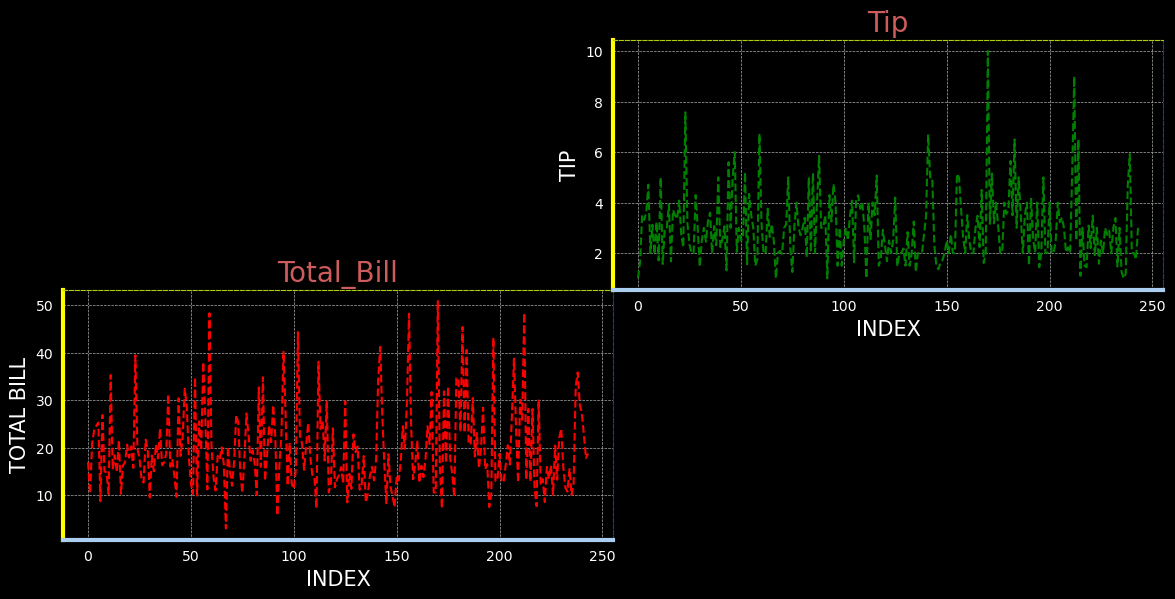

In [82]:
fig = plt.figure(facecolor="black")
ax1 = fig.add_axes([0, 0, 0.5, 0.5], facecolor="black")
ax2 = fig.add_axes([0.5, 0.5, 0.5, 0.5], facecolor="black")
ax1.plot(tip['total_bill'], 'r--')
ax2.plot(tip['tip'], 'g--')
ax1.set_title("Total_Bill", color="indianred", fontsize=20)
ax2.set_title("Tip", color="indianred", fontsize=20)
for ax in (ax1, ax2):
    ax.tick_params(labelcolor="white", labelsize=10)
    ax.spines['left'].set_color("yellow")
    ax.spines['bottom'].set_color("#abcdef")
    ax.spines['right'].set_color("#123abc")
    ax.spines['top'].set_color("#abcd12")
    ax.spines['left'].set_lw(3)
    ax.spines['bottom'].set_lw(3)
    ax.spines['right'].set_ls("--")
    ax.spines['top'].set_ls("--")
    ax.grid(lw=0.5, ls='--')
    ax.set_xlabel("INDEX", color="white", fontsize=15)
ax1.set_ylabel("TOTAL BILL", color="white", fontsize=15)
ax2.set_ylabel("TIP", color="white", fontsize=15)
plt.show()

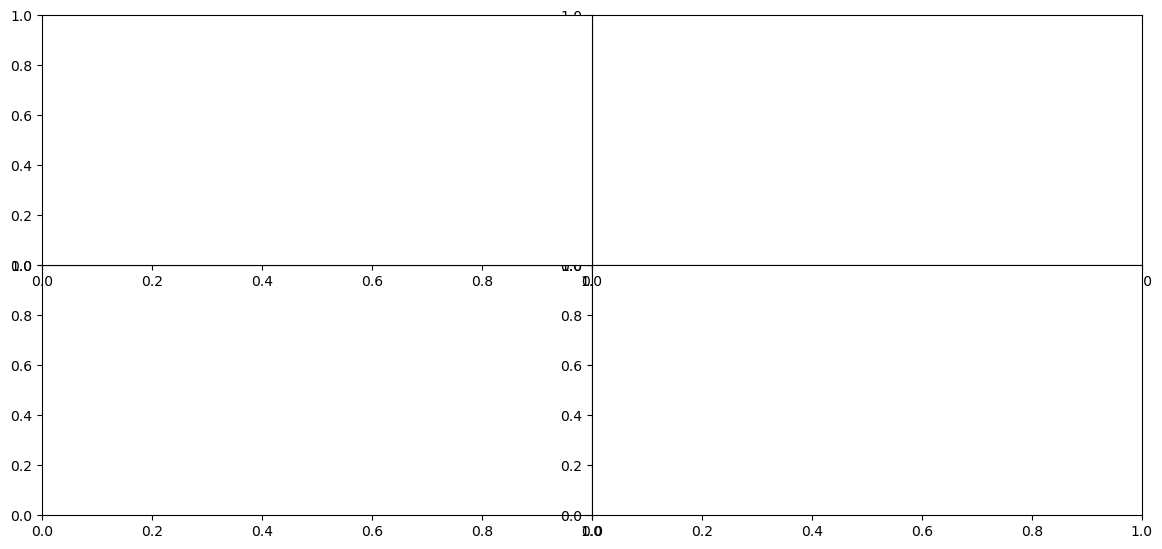

In [84]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 0.5])
ax2 = fig.add_axes([0.5, 0.5, 0.5, 0.5])
ax3 = fig.add_axes([0.5, 0, 0.5, 0.5])
ax4 = fig.add_axes([0, 0.5, 0.5, 0.5])
plt.show()

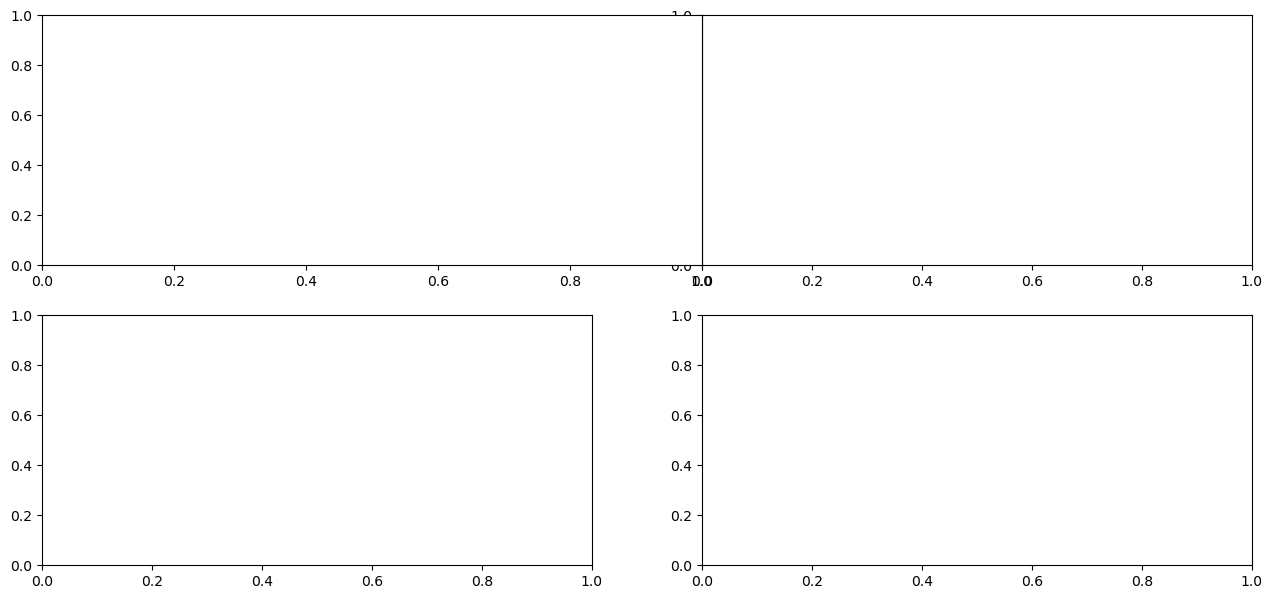

In [87]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 0.5])
ax2 = fig.add_axes([0.6, 0.6, 0.5, 0.5])
ax3 = fig.add_axes([0.6, 0, 0.5, 0.5])
ax4 = fig.add_axes([0, 0.6, 0.6, 0.5])
plt.show()

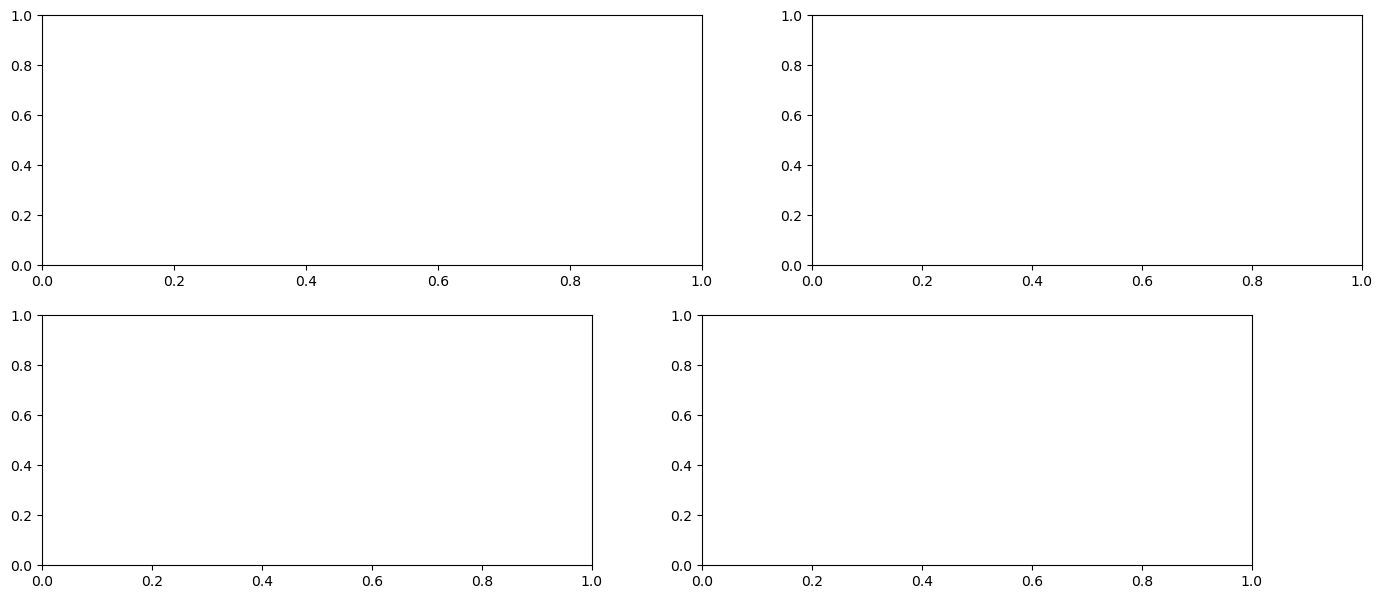

In [88]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 0.5])
ax2 = fig.add_axes([0.7, 0.6, 0.5, 0.5])
ax3 = fig.add_axes([0.6, 0, 0.5, 0.5])
ax4 = fig.add_axes([0, 0.6, 0.6, 0.5])
plt.show()

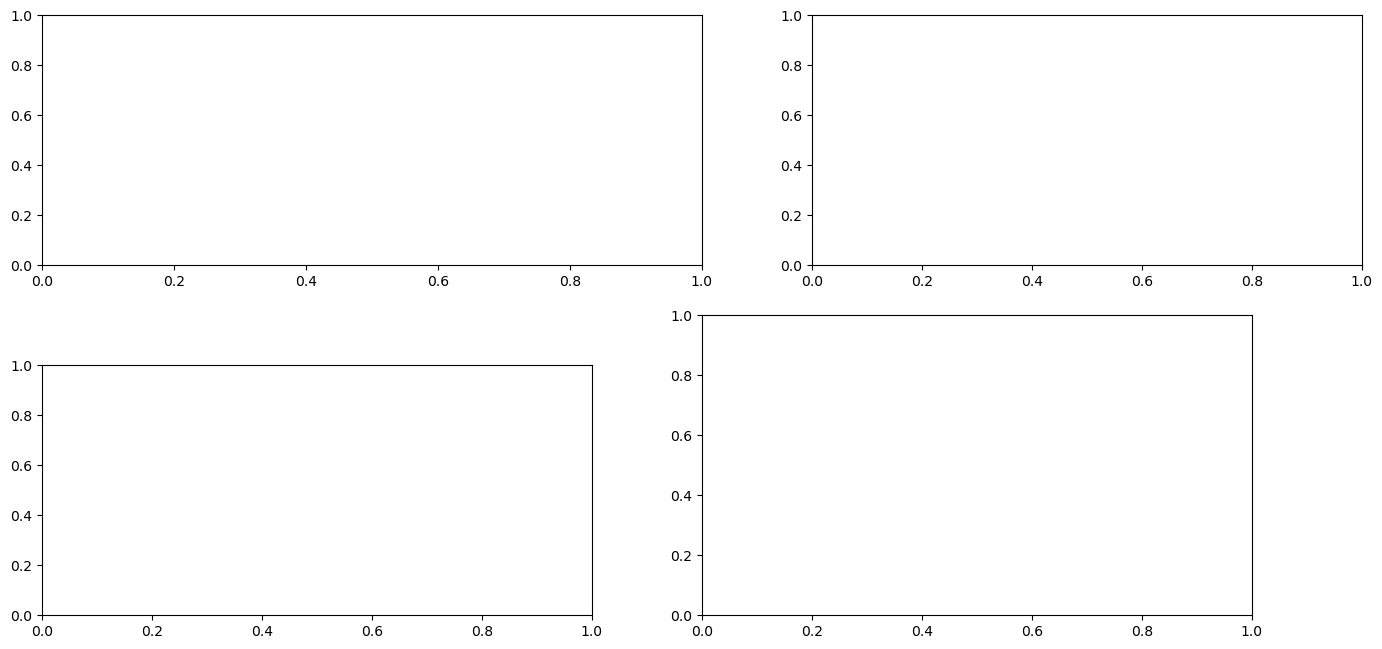

In [91]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 0.5])
ax2 = fig.add_axes([0.7, 0.7, 0.5, 0.5])
ax3 = fig.add_axes([0.6, 0, 0.5, 0.6])
ax4 = fig.add_axes([0, 0.7, 0.6, 0.5])
plt.show()

In [92]:
### axes plotting, hist, pie, etc